# **Data Preprocessing**

In this notebook, we will learn about the basics of data preprocessing. 

At the start, we will generate a toy **data set** and download an image data set.

Subsequently, we will **standardize** both data sets.

In a next step, we will implement the **principal component analysis** (PCA) algorithm and apply it on the artificial data set.

Finally, we will test the performance of the PCA on the image data set.

### **Table of Contents**
1. [Data Sets](#data-sets)
2. [Standardization](#standardization)
3. [PCA on Toy Data Set](#pca-on-toy-data-set)
4. [PCA on Image Data Set](#pca-on-image-data-set)

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import timeit
import matplotlib as mpl
import matplotlib.pyplot as plt

from ipywidgets import interact, Button, fixed
from sklearn.datasets import fetch_openml

### **1. Data Sets** <a class="anchor" id="data-sets"></a>

In this notebook, we will consider two kinds of data sets:
- a two-dimensional toy data set to illustrate eigenvectors
- and the image data set [MNIST](https://www.openml.org/d/554) containing images of hand-written digits.

Mathematically, we denote an obtained data set consisting of $N$ instances (also referred to as sample) as a matrix $\mathbf{X} \in \mathbb{R}^{N \times D}$, where the $n$-th row of this matrix represents the $n$-th instance being a $D$-dimensional feature vector: $\mathbf{x}_n = (x_{n1}, \dots, x_{nD})^\mathrm{T}$.

Below, we generate the toy data set, download the image data set, and visualize both.

/opt/homebrew/anaconda3/envs/e2ml-env/lib/python3.10/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(
/opt/homebrew/anaconda3/envs/e2ml-env/lib/python3.10/site-packages/pandas/core/arrays/categorical.py:528: RuntimeWarning: invalid value encountered in cast
  fill_value = lib.item_from_zerodim(np.array(np.nan).astype(dtype))


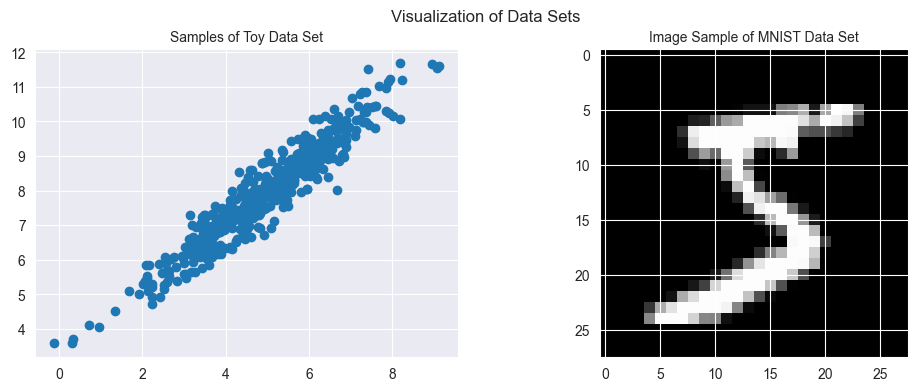

In [2]:
# Generate 500 samples using a 2-dimensional multivariate normal distributions with a mean=[5, 8] and
# a covariance matrix cov=[[2, 1.9], [1.9, 2]]
mean = [5, 8]
cov = [[2, 1.9], [1.9, 2]]
X_toy = np.random.multivariate_normal(mean=mean, cov=cov, size=500)

# Download MNIST data set.
X_img, y_img = fetch_openml('mnist_784', version=1, return_X_y=True)
X_img, y_img = X_img.values, y_img.values.astype(int)

# Plot data sets.
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
fig.suptitle('Visualization of Data Sets')
ax[0].scatter(X_toy[:, 0], X_toy[:, 1])
ax[0].set_title('Samples of Toy Data Set', fontsize=10)
ax[1].imshow(X_img[0].reshape(28, 28), cmap='gray')
ax[1].set_title('Image Sample of MNIST Data Set', fontsize=10)
plt.show()

(array([625.,  11.,   6.,   4.,   4.,   2.,   4.,   5.,   3.,   3.,   2.,
          2.,   4.,   5.,   2.,   5.,   5.,   4.,   4.,   5.,   4.,   3.,
          4.,   6.,  62.]),
 array([  0. ,  10.2,  20.4,  30.6,  40.8,  51. ,  61.2,  71.4,  81.6,
         91.8, 102. , 112.2, 122.4, 132.6, 142.8, 153. , 163.2, 173.4,
        183.6, 193.8, 204. , 214.2, 224.4, 234.6, 244.8, 255. ]),
 <BarContainer object of 25 artists>)

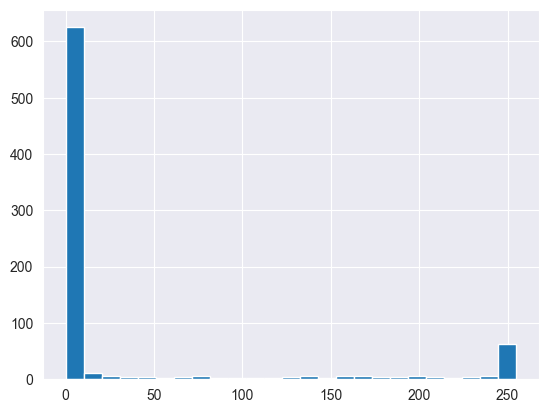

In [3]:
plt.hist(X_img[0], bins=25)

### **2. Standardization** <a class="anchor" id="standardization"></a>

Before we implement PCA, we will need to standardize the data sets. The feature value $x_{*d}$ of an instance $\mathbf{x}_*$ can be standardized according to

$\tilde x_{*d} = \frac{x_{*d}-\bar{x_d}}{\bar{\sigma_d}}$

The standardization ensures that the instances will have zero mean and one variance.

We need to implement the corresponding class [`StandardScaler`](../e2ml/preprocessing/_standard_scaler.py) in the [`e2ml.preprocessing`](../e2ml/preprocessing) subpackage.
Once, the implementation has been completed, we actually standardize both data sets and visualize the results, and check our implementation's validity. 

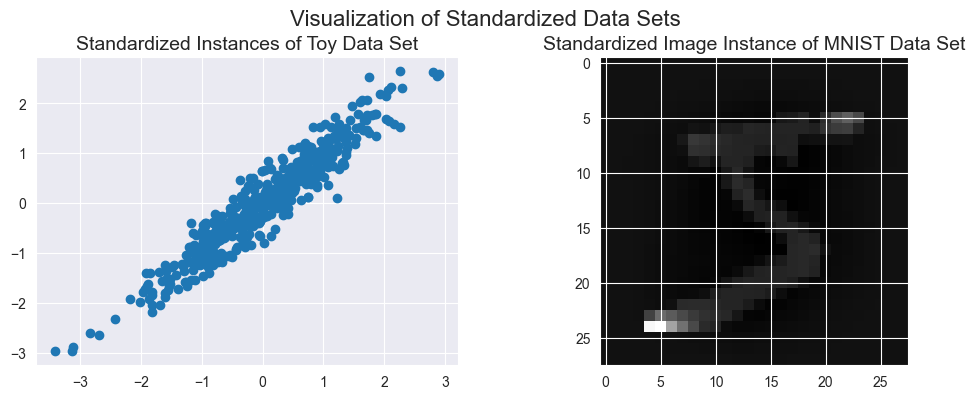

(array([143., 524.,  21.,  62.,  16.,   5.,   2.,   4.,   1.,   1.,   1.,
          1.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   2.]),
 array([-1.12435589, -0.47592483,  0.17250623,  0.8209373 ,  1.46936836,
         2.11779942,  2.76623048,  3.41466155,  4.06309261,  4.71152367,
         5.35995474,  6.0083858 ,  6.65681686,  7.30524793,  7.95367899,
         8.60211005,  9.25054112,  9.89897218, 10.54740324, 11.19583431,
        11.84426537, 12.49269643, 13.1411275 , 13.78955856, 14.43798962,
        15.08642069]),
 <BarContainer object of 25 artists>)

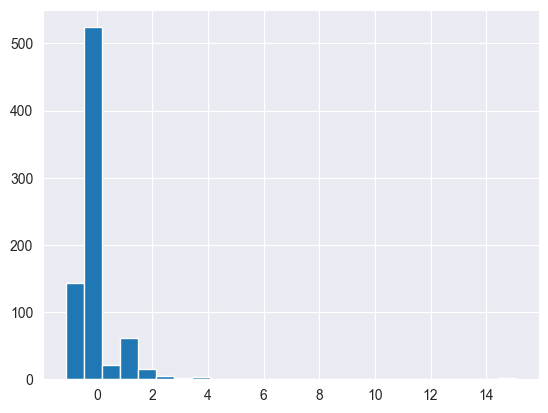

In [4]:
from e2ml.preprocessing import StandardScaler

# Fit StandardScaler on the toy data set.
scaler_toy = StandardScaler()
scaler_toy.fit(X_toy)

# Use scaler to standardize the toy data set.
X_toy_std = scaler_toy.transform(X_toy)

assert np.allclose(np.std(X_toy_std, axis=0), np.ones(X_toy_std.shape[1])), 'The standard deviations are not one.'
assert np.allclose(np.mean(X_toy_std, axis=0), np.zeros(X_toy_std.shape[1])), 'The means are not zero.'

# Fit StandardScaler on the MNIST data set.
scaler_mnist = StandardScaler()
scaler_mnist.fit(X_img)

# Use scaler to standardize the MNIST data set.
X_img_std = scaler_mnist.transform(X_img)

# Plot data sets.
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
fig.suptitle('Visualization of Standardized Data Sets', fontsize=16, y=1)
ax[0].scatter(X_toy_std[:, 0], X_toy_std[:, 1])
ax[0].set_title('Standardized Instances of Toy Data Set', fontsize=14)
ax[1].imshow(X_img_std[0].reshape(28, 28), cmap='gray')
ax[1].set_title('Standardized Image Instance of MNIST Data Set', fontsize=14)
plt.show()

# Toy data: different scale
# mnist: same scale, bc number of pixels; value displayed no longer 0 to 255, but grey values (standardized)

plt.hist(X_img_std[0], bins=25)

#### **Question:**
2. (a) Why should we standardize data before applying PCA?

    variance = information (derive sth about data)
   high variance: find feature combinations to differentiate about classes

   manifold: non-linear version of space, project data into that -> more granular decisions
   turn, shift and squeeze coordinate system to fit data better
   transform data into space where more granular decisions can be made

    X_toy is correlated -> PCA of X_toy is DEcorrelated (bc orthogonal vectors) -> obtain decorrelated data

    Difference in value ranges that data is distributed along axis -> PCA without standarizations -> Eigenvectores with los eigenvalue -> less important -> not a good description of data

### **3. PCA on Toy Data Set** <a class="anchor" id="pca-on-toy-data-set"></a>

Now we will implement PCA given a training set $\mathbf{X}$ with mean $\mathbf{\overline{x}} \in \mathbb{R}^D$ (being $\mathbf{0}$ if $\mathbf{X}$ has been standardized) to transform samples from the $D$-dimensional space into an $M \leq D$ dimensional space. 
We then need to perform the following steps.

1. Compute the (biased) covariance matrix $\boldsymbol{\Sigma} \in \mathbb{R}^{D \times D}_{\geq 0}$:
   \begin{equation}
   \boldsymbol{\Sigma} = \frac{1}{N} \sum_{n=1}^{N} (\mathbf{x}_n-\mathbf{\overline{x}}) (\mathbf{x}_n-\mathbf{\overline{x}})^\mathrm{T}.
   \end{equation}
2. Determine the eigenvector matrix $\mathbf{U} \in \mathbb{R}^{D \times D}$ of $\boldsymbol{\Sigma}$ including their corresponding eigenvalues $\boldsymbol{\lambda} \in \mathbb{R}^D$:
    \begin{equation}
       \boldsymbol{\Sigma}\mathbf{u}_i = \lambda_i\mathbf{u}_i,
    \end{equation}
    where $\mathbf{u}_i$ is the $i$-th column of the matrix $\mathbf{U}$ and $\lambda_i$ its eigenvalue.
3. After these steps, we can then compute the projection matrix $\mathbf{B} \in \mathbb{R}^{D \times M}$ by selecting the top $M$ eigenvectors:
    \begin{equation}
       \mathbf{B} = \begin{bmatrix} \mathbf{u}_{i_1}, \dots, \mathbf{u}_{i_M} \end{bmatrix} \text{ subject to } \lambda_{i_1} \geq \dots \geq \lambda_{i_M} \text{ and } \lambda_{i_M} \geq \lambda_j \text{ for all } j \in \{1, \dots, D\} \setminus \{i_1, \dots, i_M\}.
    \end{equation}
4. Finally, we can transform a sample $\mathbf{x}_*$ according to
   \begin{equation}
   \mathbf{z}_{*} = \mathbf{B}^\mathrm{T}(\mathbf{x}_*-\mathbf{\overline{x}}),
   \end{equation}
   and retransform it to the original space through
   \begin{equation}
   \tilde{\mathbf{x}}_{*} = \mathbf{B}\mathbf{z}_* + \mathbf{\overline{x}}.
   \end{equation}
   
A common way to determine the number of principal components $M$ is to define a threshold $c \in (0, 1]$ for the **explained variance** such that 
\begin{equation}
M_c = \text{arg min}_{M \in \{1, \dots, D\}} (M) \text{ subject to } \frac{\sum_{j=1}^{M} \lambda_{i_j}}{\sum_{i=l}^{D} \lambda_{l}} \geq c.
\end{equation}

   
#### **Question:**
3. (a) In which case is the retransformation $\tilde{\mathbf{x}}_{*}$ according to step 4 equal to $\mathbf{x}_{*}$. We assume that all $D$ eigenvalues  in $\boldsymbol{\lambda}$ are positive?

   If there was no information loss when transforming it to $\mathbf{z}_{*}$. Possibly if all PCAs where used, hence M=D (dimensionality of manifold is the same of original data)
   
Having implemented the class [`PrincipalComponentAnalysis`](../e2ml/preprocessing/_principal_component_analysis.py) in the [`e2ml.preprocessing`](../e2ml/preprocessing) subpackage, we apply it to the two-dimensional toy data set to visualize eigenvectors and eigenvalues.

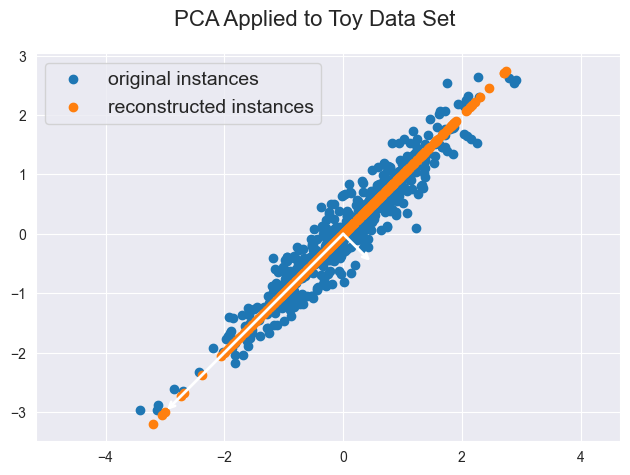

In [5]:
from e2ml.preprocessing import PrincipalComponentAnalysis

# Fit PrincipalComponentAnalysis object with M=1.
pca = PrincipalComponentAnalysis(n_components=1)
# fit on train data set, not test data set, else information of test data set is already incorporated into pca
# same for standarizing: do not mix train & test data, fit standard_scaler on training data
pca.fit(X_toy_std)

# Transform instances of standardized toy data set.
# insert data again, if data is split into train and test data set
Z = pca.transform(X_toy_std)

# Reconstruct original instances from instances samples.
X_rec = pca.inverse_transform(Z)
    
# Visualize results of PCA.
plt.figure()
plt.suptitle("PCA Applied to Toy Data Set", fontsize=16)
plt.scatter(X_toy_std[:, 0], X_toy_std[:, 1], label='original instances')
plt.scatter(X_rec[:, 0], X_rec[:, 1], label='reconstructed instances')
for lmbda, u in zip(pca.lmbdas_, pca.U_.T):
    u = u * 3 * np.sqrt(lmbda)
    plt.annotate('', pca.mu_ + u, pca.mu_, arrowprops=dict(arrowstyle='->', linewidth=2, shrinkA=0, shrinkB=0))
plt.axis('equal')
plt.legend(prop={'size': 14})
plt.tight_layout()
plt.show()

# kleiner Pfeil: 2nd eigenvector with no variance (only one dimension!) -> reconstruction looses information of 2nd dimension

### **4. PCA on Image Data Set** <a class="anchor" id="pca-on-image-data-set"></a>

In this section, we will analyze the performance of the PCA on the image data set MNIST. Therefore, we analyze how the number of selected principal components $M$ affects our reconstruction error be.
First, we have to implement a function for computing the reconstruction error (i.e., mean squared error):
\begin{equation}
J = \frac{1}{N} \sum_{n=1}^{N} ||\mathbf{x}_n - \tilde{\mathbf{x}}_{n}||^2.
\end{equation}

In [6]:
def compute_reconstruction_error(X_orig, X_rec):
    """Computes the reconstruction error, i.e., mean squared error.
    
    Parameters
    ----------
    X_orig : array-like, shape (N, D)
        Original samples.
    X_rec : array-like, shape (N, D)
        Reconstructed samples.
        
    Returns
    -------
    J : float
        Reconstruction error.
    """
    # sum on data axis
    return np.mean(np.sum(np.square(X_orig - X_rec), axis=1))

In a second step, we will now compute the error in dependence of the number of selected components $M$.

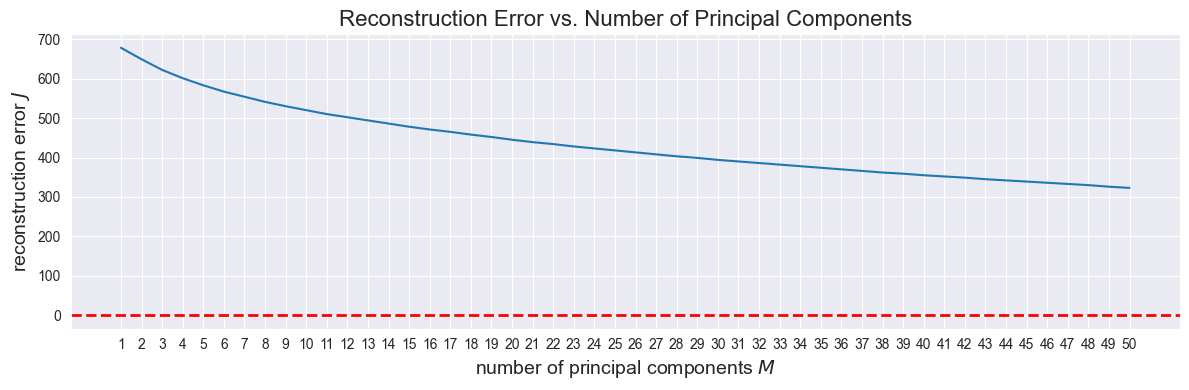

In [7]:
# Create `M_list` as array of M's ranging from 1 to 50.
#M_list = np.arange(1, 51, 1)
M_list = np.array(range(1, 51))

# Iterate over different numbers of principal components M, compute the 
# reconstruction errors, and save them in `J_list`.
J_list = np.empty_like(M_list)

# index and component
for i, M in enumerate(M_list):
    pca = PrincipalComponentAnalysis(n_components=M)
    pca.fit(X_img_std)
    Z_img = pca.transform(X_img_std)
    X_img_rec = pca.inverse_transform(Z_img)
    J_list[i] = compute_reconstruction_error(X_orig=X_img_std, X_rec=X_img_rec)
    
# Plot reconstruction error.
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(M_list, J_list)
ax.xaxis.set_ticks(M_list)
ax.axhline(xmin=0, xmax=1, linestyle='--', color='r', linewidth=2)
ax.set_xlabel('number of principal components $M$', fontsize=14)
ax.set_ylabel('reconstruction error $J$', fontsize=14)
ax.set_title('Reconstruction Error vs. Number of Principal Components', fontsize=16)
plt.tight_layout()
plt.show()

#### **Question:**
4. (a) How can we use the eigenvalues for computing the reconstruction error on the training set?

   variance that the individual eigenvector describes (=eigenvalue)
   summing eigenvalues of the non-selected eigenvectors == reconstruction error
   
Finally, we show the qualitative performance of the PCA through visual inspections of examples for different values of the explained variance.

In [9]:
# error: scaler_img
@interact(image_idx=(0, len(X_img_std)-1), x0=fixed(28), x1=fixed(28), X=fixed(X_img_std), scaler=fixed(scaler_img))
def show_explained_variance_reconst(image_idx, x0, x1, X, scaler):
    """
    Shows the reconstruction of image `X[image_idx]` for different values `c` of explained
    variances.
    
    Parameters
    ----------
    image_idx : int
        Index of image to be reconstructed.
    x0 : int
        Number of pixels in first dimension.
    x1 : int
        Number of pixels in second dimension.
    X : array-like, shape (N, D)
        Images to be reconstracted.
    scaler : StandardScaler
        Fitted scaler to invert standardization.
    """
    # Define list of explained variances.
    c_list = np.array([0.01, 0.10, 0.50, 0.90, 0.99])
    
    # Plot original digit.
    fig, ax = plt.subplots(1, len(c_list)+1, figsize=(20, 4))
    ax[0].imshow(scaler.inverse_transform([X[image_idx]]).reshape(x0, x1), cmap='gray')
    ax[0].set_title('Original Image', fontsize=14)
        
    # Plot reconstructed digits for different values of explained variances.
    for i, c in enumerate(c_list):
        # Fit PrincipalComponentAnalysis with explained variance `c`.
        pca = PrincipalComponentAnalysis(c)
        pca.fit(X_img_std)
        
        # Transform instance with index `image_idx` and save it as `z_selected`.
        z_selected = pca.transform(X_img_std[image_idx])
        
        # Reconstruct instance `x_rec_selected` from `z_selected`.
        x_rec_selected = pca.inverse_transform(z_selected)
        
        # Plot reconstructed instance with index image_idx.
        ax[i+1].imshow(scaler.inverse_transform(x_rec_selected).reshape(x0, x1), cmap='gray')
        ax[i+1].set_title(
            f'Explained Variance: $c={c}$,\n Number of Components $M={pca.n_components_}$', fontsize=14
        )
    plt.tight_layout()
    plt.show()

interactive(children=(IntSlider(value=34999, description='image_idx', max=69999), Output()), _dom_classes=('wi…